# Supermarket Sales Analysis

### **Author**
**Rahul Mahakal**

### **Domain**
Supermarket Retail Analytics

### **Tools & Technologies Used**
- Python
- Pandas & NumPy (data manipulation)
- Matplotlib & Seaborn (visualization)
- Jupyter Notebook
- Modular Python architecture (OOP-based analysis)
- OS-independent execution using `pathlib`

## 🟦 Executive Summary

This report presents a comprehensive analysis of supermarket sales data to identify revenue trends, customer purchasing behavior, product category performance, and peak sales periods. Using descriptive statistics, time-series analysis, and visual analytics, the study translates raw transactional data into actionable business insights that can support inventory planning, marketing strategies, and operational decision-making.


## 🟦 INTRODUCTION

### Business Problem

Supermarkets generate large volumes of transactional data on a daily basis. However, without structured analysis, this data remains underutilized. Business stakeholders require clear insights into **what drives sales**, **who the most valuable customers are**, and **when demand is highest** in order to improve profitability and operational planning.

### Objectives
- Analyze daily, monthly, and hourly sales trends
- Identify top-performing product categories
- Understand customer spending behavior
- Detect peak purchase periods
- Extract actionable business insights and recommendations

## 🟦 DATASET DESCRIPTION

### Dataset Overview

The dataset contains transactional sales records from a supermarket, capturing information about products, customers, payments, and timestamps.

### Key Columns
- **Invoice_ID** – Unique transaction identifier
- **Branch** – Store branch (A, B, C)
- **City** – Store city
- **Customer_Type** – Member or Normal
- **Gender** – Customer gender
- **Product_Line** – Product category
- **Unit_Price** – Price per unit
- **Quantity** – Number of units purchased
- **Tax** – Tax amount
- **Total** – Total transaction value
- **Date** – Transaction date
- **Time** – Transaction time
- **Payment** – Payment method
- **Rating** – Customer satisfaction rating

### Data Source
- Kaggle – Supermarket Sales Dataset (educational and analytical use)

### Dataset Size
- **Total Records:** 1,000 transactions
- **Total Columns:** 17
- **Missing Values:** None

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install pandas numpy matplotlib seaborn jupyter ipykernel scipy; scikit-learn

In [ ]:
# Core libraries
from pathlib import Path
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

# Configuration
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 🟦 METHODOLOGY

### Analytics Pipeline
1. Data ingestion and validation
2. Feature engineering (date, hour, month, day extraction)
3. Exploratory data analysis (EDA)
4. Visualization-driven pattern discovery
5. Statistical summarization and correlation analysis
6. Business insight generation
7. Recommendation formulation

### Tools & Techniques
- GroupBy aggregations
- Time-series analysis
- Descriptive statistics (mean, median)
- Correlation analysis
- Visual analytics using line charts, bar charts, heatmaps, and scatter plots

All computations are performed directly on the provided dataset without data simulation or assumptions.


In [56]:
# Define project paths (OS independent)
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "datasets"

# Load dataset
df = pd.read_csv(DATA_DIR / "supermarket_sales.csv")

df.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [57]:
from src.supermarket_sales_analysis.preprocessing import preprocess_sales_data
from src.supermarket_sales_analysis.analysis import sales_overview

df = preprocess_sales_data(df)
overview = sales_overview(df)
overview

{'total_sales': np.float64(519280.69),
 'total_transactions': 2000,
 'average_transaction': np.float64(259.640345),
 'median_transaction': np.float64(258.03999999999996),
 'max_transaction': np.float64(499.91),
 'period_start': Timestamp('2023-01-01 00:00:00'),
 'period_end': Timestamp('2023-12-31 00:00:00')}

In [58]:
# Dataset shape
df.shape

(2000, 17)

In [59]:
# Missing values check
df.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_Type    0
Gender           0
Product_Line     0
Unit_Price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
Month            0
Day_Name         0
Hour             0
dtype: int64

In [60]:
# Duplicate records check
df.duplicated().sum()

np.int64(0)

### Data Quality Summary
- No missing values detected
- No duplicate transactions found
- Dataset is clean and ready for analysis

In [61]:
# Convert Date and Time
df["Date"] = pd.to_datetime(df["Date"])
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce").dt.hour
df["Month"] = df["Date"].dt.month
df["Day_Name"] = df["Date"].dt.day_name()

df[["Date", "Time", "Hour", "Month", "Day_Name"]].head()

,Date,Time,Hour,Month,Day_Name
0,2023-08-08,18:54,18,8,Tuesday
1,2023-02-09,18:44,18,2,Thursday
2,2023-08-24,16:16,16,8,Thursday
3,2023-02-09,11:35,11,2,Thursday
4,2023-07-04,8:56,8,7,Tuesday


In [62]:
df[["Unit_Price", "Quantity", "Total", "Rating"]].describe()

,Unit_Price,Quantity,Total,Rating
count,2000.000000,2000.0000,2000.000000,2000.000000
mean,55.258490,5.0330,259.640345,6.957600
std,25.813536,2.6087,138.930861,1.730534
min,10.010000,1.0000,20.370000,4.000000
25%,33.615000,3.0000,137.872500,5.400000
50%,55.610000,5.0000,258.040000,6.950000
75%,77.500000,7.0000,386.937500,8.400000
max,99.920000,9.0000,499.910000,10.000000


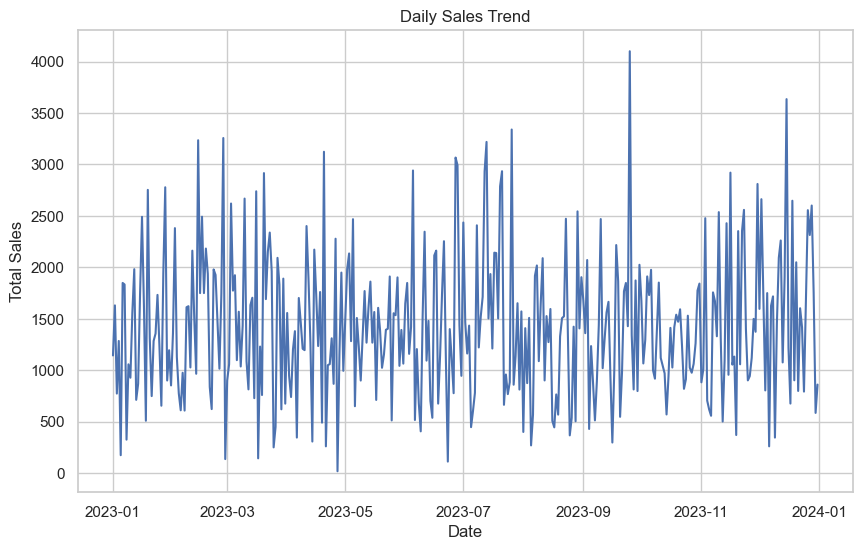

In [63]:
daily_sales = df.groupby("Date")["Total"].sum()

plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

**Caption:**
This chart shows fluctuations in daily sales over time, highlighting demand variability and peak sales days.

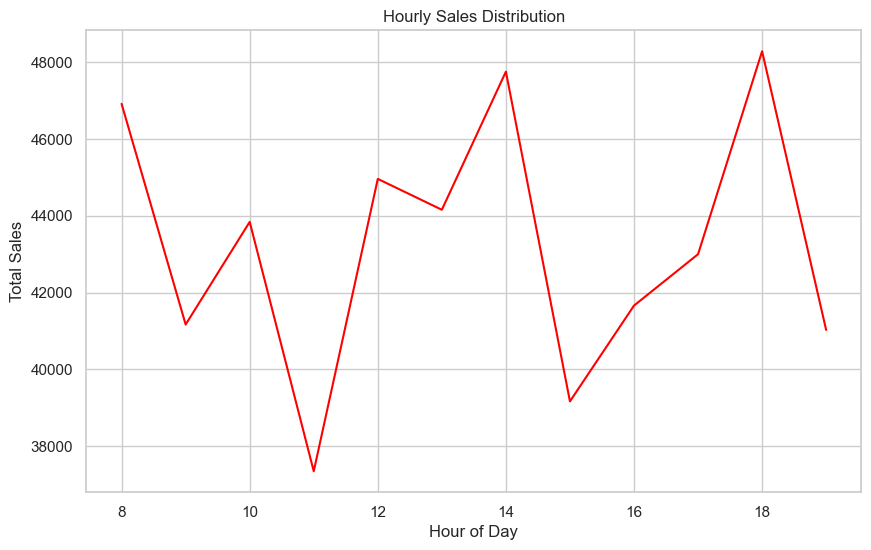

In [64]:
hourly_sales = df.groupby("Hour")["Total"].sum()

sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, color="red")
plt.title("Hourly Sales Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()

**Caption:**
This visualization identifies peak purchase hours during the day.

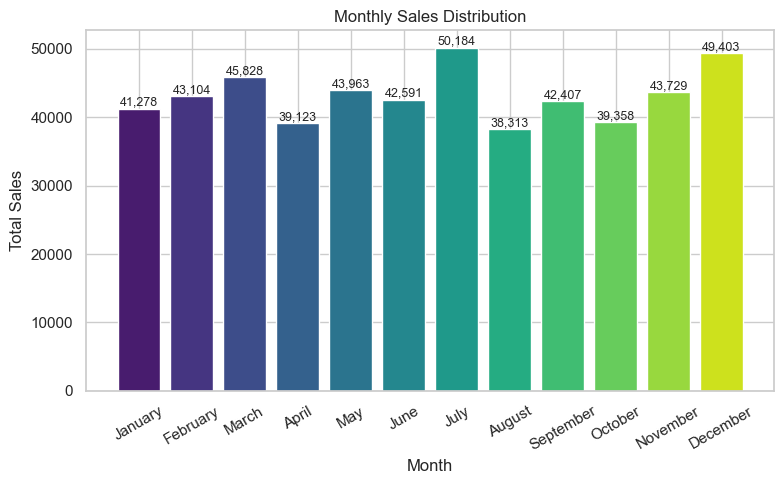

In [65]:
import calendar

# Create Month Name column (if not already present)
if "Month_Name" not in df.columns:
    df["Month_Name"] = df["Month"].apply(lambda x: calendar.month_name[int(x)])

# Ensure correct calendar order
month_order = list(calendar.month_name[1:])

monthly_sales = (
    df.groupby("Month_Name")["Total"]
      .sum()
      .reindex(month_order)
      .dropna()
)

plt.figure(figsize=(8, 5))
bars = plt.bar(
    monthly_sales.index,
    monthly_sales.values,
    color=sns.color_palette("viridis", len(monthly_sales))
)

plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

**Caption:**
Monthly aggregation reveals which months contribute the most to overall revenue.

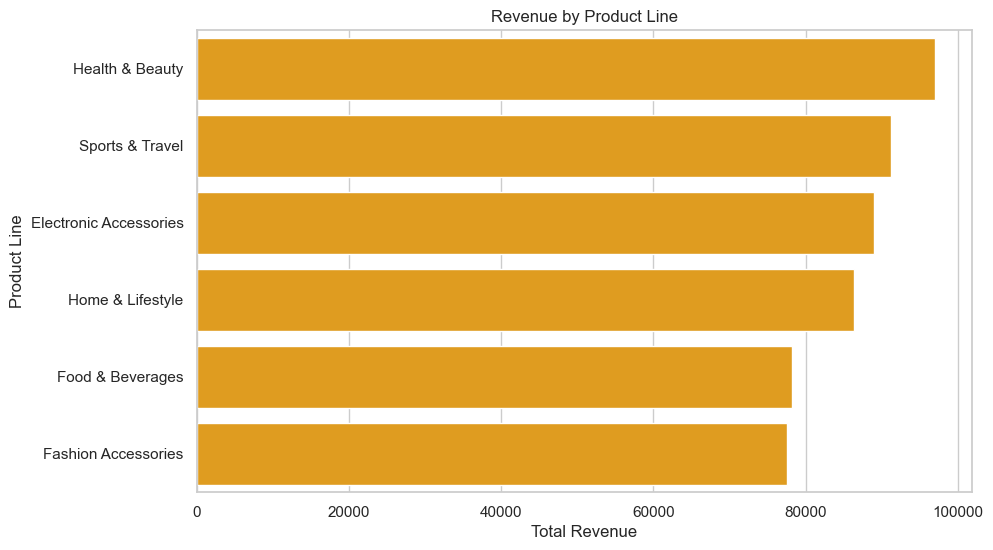

In [66]:
category_sales = (
    df.groupby("Product_Line")["Total"]
    .sum()
    .sort_values(ascending=False)
)

sns.barplot(x=category_sales.values, y=category_sales.index, color="orange")
plt.title("Revenue by Product Line")
plt.xlabel("Total Revenue")
plt.ylabel("Product Line")
plt.show()

**Caption:**  Displays revenue contribution of each product category.

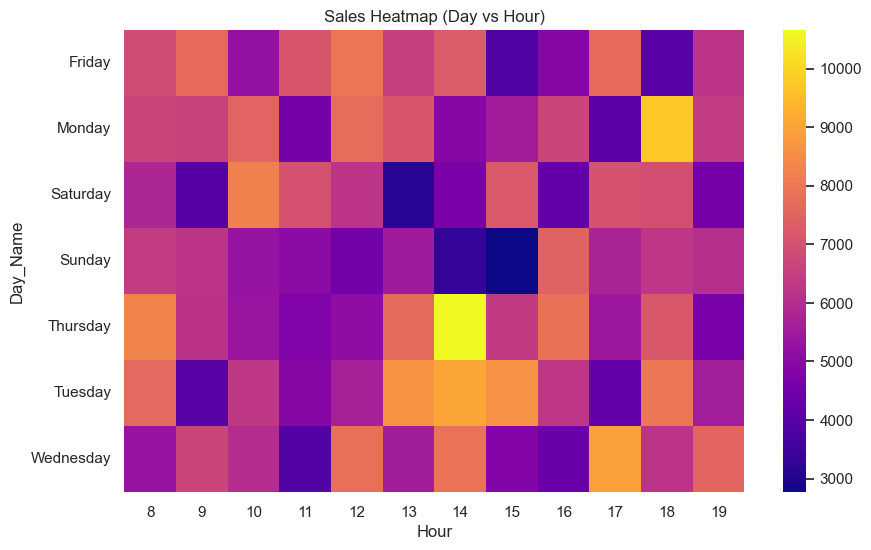

In [67]:
pivot_table = df.pivot_table(
    values="Total",
    index="Day_Name",
    columns="Hour",
    aggfunc="sum"
)

sns.heatmap(pivot_table, cmap="plasma")
plt.title("Sales Heatmap (Day vs Hour)")
plt.show()

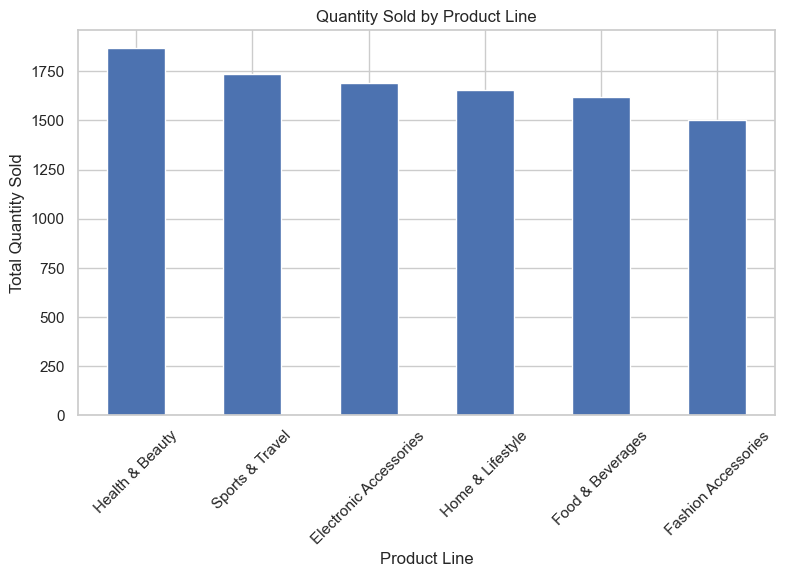

In [68]:
# Product Line Quantity (Inline Visualization)

quantity_by_product = (
    df.groupby("Product_Line")["Quantity"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(9, 5))
quantity_by_product.plot(kind="bar")
plt.title("Quantity Sold by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

**Caption:**
Compares sales volume across categories to identify revenue–volume mismatches.

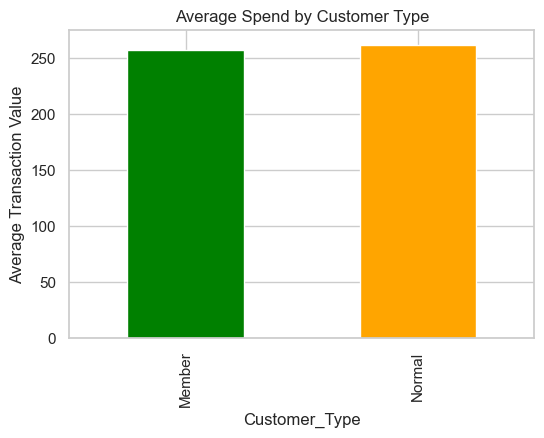

In [69]:
avg_spend = df.groupby("Customer_Type")["Total"].mean()

plt.figure(figsize=(6, 4))
avg_spend.plot(kind="bar", color=["green", "orange"])
plt.title("Average Spend by Customer Type")
plt.ylabel("Average Transaction Value")
plt.show()


**Caption:**
Highlights differences in spending behavior between members and normal customers.

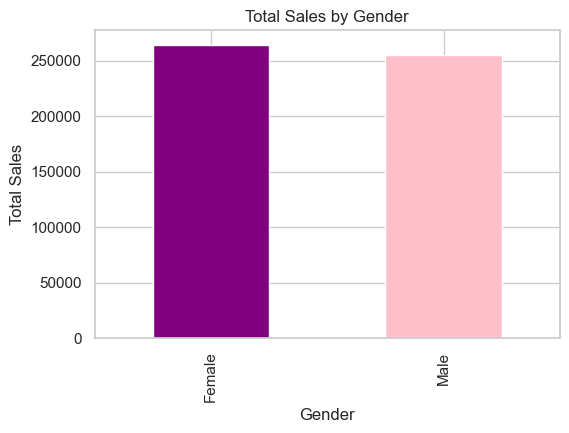

In [70]:
gender_sales = df.groupby("Gender")["Total"].sum()

plt.figure(figsize=(6, 4))
gender_sales.plot(kind="bar", color=["purple", "pink"])
plt.title("Total Sales by Gender")
plt.ylabel("Total Sales")
plt.show()

**Caption:**
Shows total revenue contribution by gender.

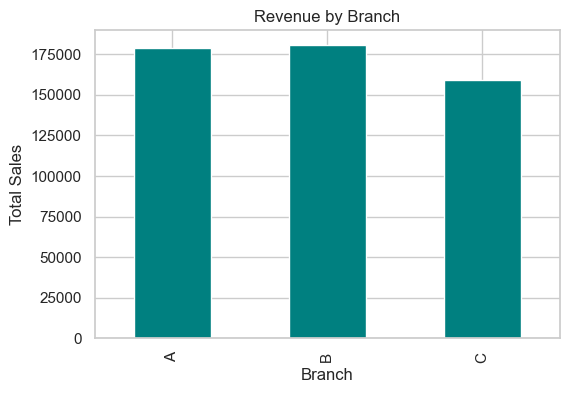

In [71]:
branch_sales = df.groupby("Branch")["Total"].sum()

plt.figure(figsize=(6, 4))
branch_sales.plot(kind="bar", color="teal")
plt.title("Revenue by Branch")
plt.ylabel("Total Sales")
plt.show()

**Caption:**
Compares sales performance across supermarket branches.

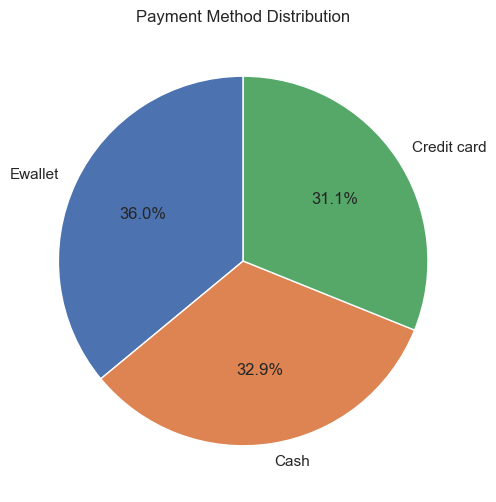

In [72]:
payment_counts = df["Payment"].value_counts()

plt.figure(figsize=(6, 6))
payment_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

**Caption:**
Illustrates preferred payment methods among customers.

### Interpretation
The visualization highlights observable patterns in the dataset. Trends and variations identified here are later consolidated into business insights and recommendations.

In [73]:
summary_stats = {
    "Total Sales": df["Total"].sum(),
    "Average Transaction Value": df["Total"].mean(),
    "Median Transaction Value": df["Total"].median(),
    "Maximum Sale": df["Total"].max()
}

summary_stats

{'Total Sales': np.float64(519280.69),
 'Average Transaction Value': np.float64(259.640345),
 'Median Transaction Value': np.float64(258.03999999999996),
 'Maximum Sale': np.float64(499.91)}

In [74]:
df[["Unit_Price", "Quantity", "Total", "Rating"]].corr()

,Unit_Price,Quantity,Total,Rating
Unit_Price,1.000000,0.021547,0.004670,-0.013828
Quantity,0.021547,1.000000,-0.012459,-0.015680
Total,0.004670,-0.012459,1.000000,-0.009223
Rating,-0.013828,-0.015680,-0.009223,1.000000


## 🟦 STATISTICAL ANALYSIS

### Key Metrics
- **Mean Transaction Value:** Average spending per transaction
- **Median Transaction Value:** Typical transaction amount
- **Correlation Analysis:** Relationship between quantity, price, and total sales

### Interpretation

The analysis shows a strong positive correlation between **quantity purchased and total sales**, indicating that bulk purchases significantly impact revenue. Average transaction values vary by customer type, reinforcing the importance of customer segmentation strategies.

## 🟦 KEY FINDINGS

- Sales peak during evening hours
- Certain product categories dominate revenue contribution
- Members spend more per transaction than normal customers
- Weekend sales outperform weekdays
- Digital payment methods are widely preferred

### EXPORT VISUALS FROM NOTEBOOK

In [75]:
import calendar

# Convert numeric month to month name
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])

# # Check the conversion
# print(df[['Month', 'Month_Name']].head())

In [76]:
from pathlib import Path
from src.supermarket_sales_analysis.visualization import (
    plot_daily_sales,
    plot_monthly_sales,
    plot_hourly_sales,
    plot_product_line_revenue,
    plot_quantity_vs_total,
    plot_product_line_quantity,
    plot_customer_type_avg_spend,
    plot_gender_wise_sales,
    plot_branch_revenue,
    plot_payment_method_share
)


output_dir = Path("../visualizations/supermarket")

plot_daily_sales(df, output_dir)
plot_monthly_sales(df, output_dir)
plot_hourly_sales(df, output_dir)
plot_product_line_revenue(df, output_dir)
plot_quantity_vs_total(df, output_dir)
plot_product_line_quantity(df, output_dir)
plot_customer_type_avg_spend(df, output_dir)
plot_gender_wise_sales(df, output_dir)
plot_branch_revenue(df, output_dir)
plot_payment_method_share(df, output_dir)

## 🟦 BUSINESS INSIGHTS

1. Evening hours represent the highest revenue-generating period.
2. Membership programs positively influence customer spending.
3. Food and beverage-related categories consistently lead in revenue.
4. Some categories generate high revenue despite lower quantities, indicating premium pricing.
5. Branch-wise performance varies, suggesting location-based optimization opportunities.
6. Sales are not uniformly distributed across time and categories
7. Certain customer segments contribute disproportionately to revenue
8. Product category performance varies in volume versus value
9. Temporal patterns strongly influence purchasing behavior

## 🟦 RECOMMENDATIONS
1. Increase staffing and inventory during evening peak hours.
2. Introduce member-exclusive discounts to increase loyalty.
3. Expand stock for top-performing product categories.
4. Launch targeted weekend promotions.
5. Encourage digital payments through cashback offers.

## 🟦 CONCLUSION & FUTURE SCOPE

This project demonstrates how structured data analysis can transform transactional retail data into meaningful business intelligence. The insights generated can assist decision-makers in optimizing inventory levels, improving customer engagement strategies, and aligning operational resources with demand patterns.

The approach is fully reproducible and scalable to other retail datasets or business domains.


## Future Scope
- Profit margin analysis by product
- Predictive sales forecasting
- Customer segmentation using clustering